In [101]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

In [102]:
# Import data
df = pd.read_csv('../Resources/Cleaning2/merged_events_bio.csv')
df.head(10)

,Athlete_ID,Name,Age,Sex,Height(cm),Weight(kg),Sport,Country_Name,Country_Code,Year,Season,isTeamSport,Medal,Result_ID
0,16809,Károly Teppert,21.0,M,NaN,NaN,Cycling Road,Hungary,HUN,1912,Summer,False,na,153233
1,16809,Károly Teppert,21.0,M,NaN,NaN,Cycling Road,Hungary,HUN,1912,Summer,True,na,153234
2,43737,Andrzej Socharski,29.0,M,173.0,72.0,Shooting,Poland,POL,1976,Summer,False,na,51745
3,50147,Nathalie Wunderlich,21.0,F,170.0,50.0,Swimming,Switzerland,SUI,1992,Summer,False,na,7860
4,50147,Nathalie Wunderlich,21.0,F,170.0,50.0,Swimming,Switzerland,SUI,1992,Summer,False,na,7870
5,50147,Nathalie Wunderlich,21.0,F,170.0,50.0,Swimming,Switzerland,SUI,1992,Summer,False,na,7919
6,5085,Miha Lokar,25.0,M,182.0,76.0,Basketball,Yugoslavia,YUG,1960,Summer,True,na,32115
7,136329,Austin Hack,24.0,M,203.0,100.0,Rowing,United States,USA,2016,Summer,True,na,354004
8,136329,Austin Hack,28.0,M,203.0,100.0,Rowing,United States,USA,2020,Summer,True,na,19008478
9,38633,Tsuneo Ogasawara,22.0,M,181.0,80.0,Rowing,Japan,JPN,1964,Summer,True,na,158458


In [103]:
# Define the medal colors
colors = {'Gold': 'gold', 'Silver': 'silver', 'Bronze': 'brown'}

In [104]:
# Set a filter on the year
year = 2020

In [105]:
# Filter the data to exclude rows with no medal
df = df[(df['Medal'].isin(['Gold', 'Silver', 'Bronze'])) & (df['Year'] == year)]

In [106]:
# Create scatter plot
fig = go.Figure()

for medal in colors:
    fig.add_trace(go.Scatter(
        x=df[df['Medal'] == medal]['Weight(kg)'],
        y=df[df['Medal'] == medal]['Height(cm)'],
        mode='markers',
        marker=dict(
            size=10,
            color=df[df['Medal'] == medal]['Medal'].map(colors),
            symbol=df[df['Medal'] == medal]['Sex'].map({'M': 'square', 'F': 'circle'})
        ),
        name=medal,
        visible=False  # Hide traces by default
    ))

In [107]:
# Show the first trace by default
fig.data[0].visible = True

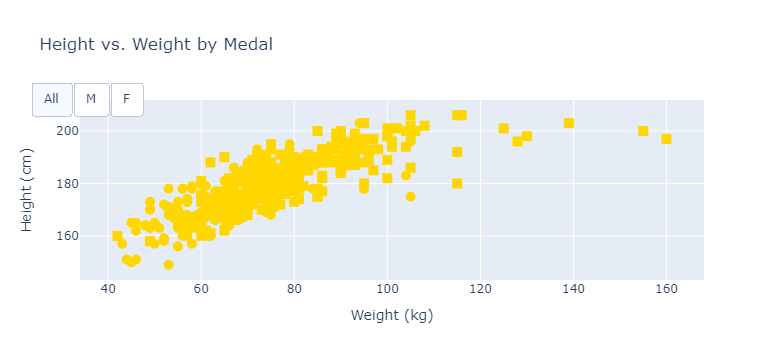

In [108]:
# Update the layout
fig.update_layout(
    title='Height vs. Weight by Medal',
    xaxis_title='Weight (kg)',
    yaxis_title='Height (cm)',
    updatemenus=[dict(
        type='buttons',
        direction='left',
        buttons=list([
            dict(
                label='All',
                method='update',
                args=[{'visible': [True, True, True]}]
            ),
            dict(
                label='M',
                method='update',
                args=[{'visible': [True, False, True]}]
            ),
            dict(
                label='F',
                method='update',
                args=[{'visible': [False, True, True]}]
            )
        ]),
        showactive=True,
        x=0.1,
        y=1.1
    )]
)
# Show the plot
fig.show()